# Training Models

## Linear Regression

### Normal equation  
teta_hat = (Xt X)-1 Xt y

In [2]:
import numpy as np 

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

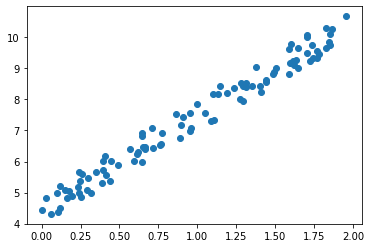

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X,y)

In [4]:
X_intercept = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_intercept.T.dot(X_intercept)).dot(X_intercept.T).dot(y)
theta_best

array([[4.48757715],
       [2.97427021]])

The function that we plot is y = 4 + 3x1 + Gaussian Noise, so we would have hoped for theta0 = 4 and theta1 = 3

In [5]:
X_new = np.array([[0],[2]])
X_new_intercept = np.c_[np.ones((2,1)), X_new]
y_pred = X_new_intercept.dot(theta_best)

In [6]:
y_pred

array([[ 4.48757715],
       [10.43611757]])

(0.0, 2.0, 0.0, 15.0)

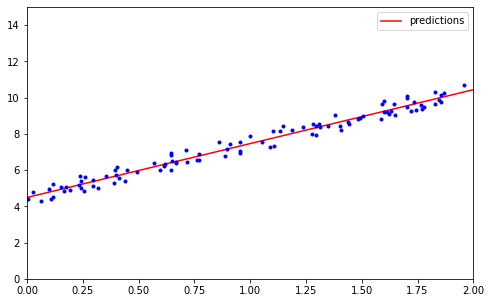

In [7]:
plt.figure(figsize=(8,5))
plt.plot(X_new, y_pred, 'r-',label='predictions')
plt.plot(X, y, "b.")
plt.legend()
plt.axis([0, 2, 0, 15])

Linear Regression using Scikit-learn

In [8]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X, y)
print("Intercept: {}, Coeff:{}".format(lr_model.intercept_, lr_model.coef_)) # We find the same parameters as before
lr_model.predict(X_new)

Intercept: [4.48757715], Coeff:[[2.97427021]]


array([[ 4.48757715],
       [10.43611757]])

In [9]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_intercept, y, rcond=1e-6)
theta_best_svd

array([[4.48757715],
       [2.97427021]])

This function computes theta_hat = X+ y, where X+ is the *pseudoinverse* of X. 

In [10]:
np.linalg.pinv(X_intercept).dot(y)

array([[4.48757715],
       [2.97427021]])

Computational complexitiy: 
* Normal equation: O(n^2.4)
* Using svd : O(n^2)

## Gradient Descent

### Batch gradient descent

*Gradient descent step* :   
Theta+1 = Theta - eta * Derivée de MSE(Theta), où eta est le learning rate et theta le vecteur des paramètres 

In [11]:
eta = .1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # randn() generates an array from the normal distribution N(0,1)

for n in range(n_iterations):
    gradients = 2/m * X_intercept.T.dot(X_intercept.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([[4.48757715],
       [2.97427021]])

That's exactly what we found using the Normal Equation!  

How to chose the correct number of iterations? Choose a very high number of iterations but stop the algorithm when your gradients vector is getting very small, i.e when values are less than an epsilon value, called the *tolerance*   

Convergence rate:  
When the cost function is convex and its slope does not change abruptly (as is the case for the MSE cost function), Batch gradient descent with a fixed learning rate will eventually converge to the optimal solution, but you may have to wait a while. It can take 0(1/epsilon) iterations. If you divide the tolerance by 10 to have a more precise solution, then the algorithm may have to run about 10 times longer.

### Stochastic Gradient Descent

The main problem with Batch Gradient Descent is the fact that is uses the whole training set to compute the gradients at every step.  
At opposite, SGD picks a random instance in the training set at every step and computes the gradient only on that single instance.   
This obviously gets the computation time way faster but on the other hand do its stochastic nature, this algorithm is much less regular than BGD.  

One solution to this dilemma is to gradually reduce the learning rate. The function that determines the learning rate at each iteration is called the *learning schedule*


In [17]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t+t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_intercept[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) -yi)
        eta = learning_schedule(epoch*m +i)
        theta = theta - eta*gradients
theta

array([[4.49095921],
       [2.96058444]])

**Warning note:**  When using SGD, the training instances must be independent and idenically distributed (IID) to ensure that the parameters get pulled toward the global optimum, on average.  
A simple way to ensure this is to shuffle the instances during training (pick each instance randomly, or shuffle the training set at the beginning of each epoch). If you do not shuffle the instances, for-example, if the instances are sorted by label then SGD will start by optimizing for one label, then the next one...

In [27]:
# SGD LR with maximum 1000 epochs, stop when the loss drop by less thant 0.001, with a lr starts with 0.1 and a default learning schedule, and no regularization (penality = None)

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel()) # .ravel() is for flatten
sgd_reg.intercept_, sgd_reg.coef_ # Once again we find a solution quite close to the one returned by the Normal Equation

(array([4.47002633]), array([2.98669865]))

### Comparison of algorithms for Linear Regression

| Algorithm       | Large m | Out-of-core support | Large n | Hyperparams                       | Scaling required | Scikit-learn     |
|-----------------|---------|---------------------|---------|-----------------------------------|------------------|------------------|
| Normal Equation | Fast    | No                  | Slow    | 0                                 | No               | N/A              |
| SVD             | Fast    | No                  | Slow    | 0                                 | No               | LinearRegression |
| Batch GD        | Slow    | No                  | Fast    | 2 (learning rate, tolerance rate) | Yes              | SGDRegressor     |
| Stochastic GD   | Fast    | Yes                 | Fast    | >2 (+ learning schedule)          | Yes              | SGDRegressor     |
| Mini-Batch GD   | Fast    | Yes                 | Fast    | >2 (+ learning schedule)          | Yes              | SGDRegressor     |

## Polynomial Regression

What if your date is more complex than a simple straight line? Surprisingly, you can use linear model to fit unlinear data. A simple way to do this is to add powers of each features, then train a linear model on this extended set of features. This technique is called *Polynomial Regression*

In [71]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

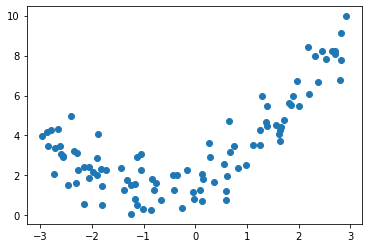

In [72]:
plt.scatter(X,y)

Clearly, a straight line will never fit this data properly. So let's use Scikit-learn's *PoylynomialFeatures* to transform our training data, adding the quare of each feature in the training st as a new feature. 

In [73]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X_poly[0])

[-0.75275929  0.56664654]


In [74]:
X_poly[:3]

array([[-0.75275929,  0.56664654],
       [ 2.70428584,  7.3131619 ],
       [ 1.39196365,  1.93756281]])

In [75]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

y_hat = 0.49 x1^2 + 0.99 x1 + 2.49 when if fact the function was y = 0.5 x1^2 + 1 * x1 + 2 + Gaussian noise 

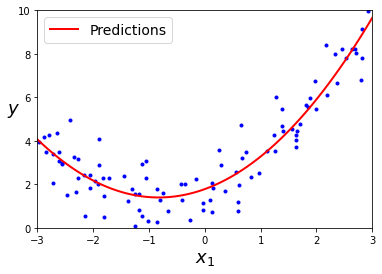

In [76]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

### Learning curves

If you perform high-degree Polynomial Regression, you will likely fit the training data much better than with plain Linear Regression

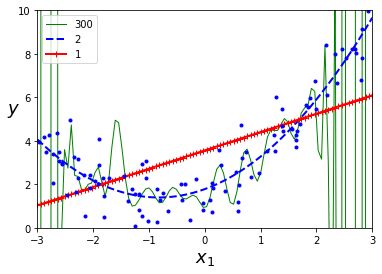

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

This 300 degree polynomial model is severely overfitting the training data, while the linear model is underfitting it. The model that will generalize best in this case is the quadratic model, which makes sense because the data was generated using a quadratic model.   
But in general, you won't know what function generated the data, so how can you decide how complex your model should be? How can you tell that your model is overfitting or underfitting the data?   
Two solutions: 
* Cross validation
* look at the *learning-curves*

In [84]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors),'r-+', linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors),'b-', linewidth=3, label="val")
    plt.legend()

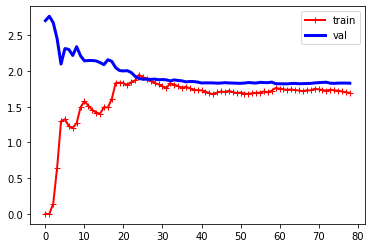

In [85]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X,y)

This model that's underfitting deserves a bit of explanation.  
First, let's look at the performance on the training data: when there ara just one of two instances in the training set, the model can fit them perfectly, which is why the red curve starts at zero.  But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it's not linear at all. So the error on the training data goes up until it reaches a plateau, at wihch point adding new instances to the training set doesnt make the average error much better or worse.  
Now let's look at the performance of the model on the validation data. When the model is trained on very few training instances, it is incapble of generalizing properly, which is why the validation error is initially quite big? Then, as the model is shown more training examples, it learns, thus the validation error slowly goes down. However, once again a straight line cannot do a good job modeling the data, so the error ends up as a plateau, very close to the other curve.

The learning curves are typical of a model that's underfitting. Both curves have reached a plateau, they are close and fairly high.

**Tips**: If your model is underfitting the training data, adding more training examples will not help. You need to use a more complex model or come up with better features.

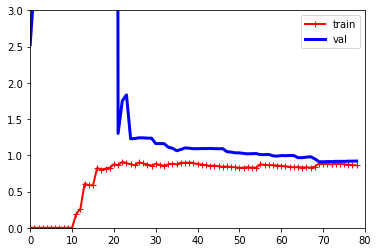

In [108]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
plt.show()                        # not shown

### *The Bias/Variance Trade-off*

**Bias**:   

This part of the generalization error is due to to wrong assumptions, such as assumping that the data is linear when it is actually quadratic. A high-ias model is most likely to underfit the training data.   



**Variance**:  

This part is due to model's excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree polynmodial model) is likely to have high variance and thus overfit the training data



**Irreducible error**: 

This part is due to the noisiness of the data itself. The only way toreduce this part of the error is to clean up the data  


Increasing a model's complexity will typically increase its variance and reduce its bias. Conversely, reducing a model's complexity increases its bias and reduces its variance. This is why it is called a trade-off.


## Regularized Linear Models

As we saw previously, a good way to reduce overfitting is to regularize the model: the fewer degrees of freedom it has, the harder it will for it to overfit the data. A simple way to regularize a polynomial model is to reduce the number of polynomial degrees.  

For a linear model, regularization is typically achieved by constraining the weights of the model. We will now look at Ridge Regression, Lasso Regression and Elastic Net, which implement three different ways to constrain the weights.

### Ridge Regression (L2 regularization)

**Info**: It is quite common for the cost function used during different from the performance measure used for testing. Apart from regularization, another reasn they might be different is that a good training cost function should have optimization-friendly derivatives, while the performance measure used for testing should be as close as possible to the final objective. For example, classifiers are often trained using a cost function such as the log loss but evaluated using precision/recall.

**Warning note**:  
It is important to scale the data (e.g, using a `StandardScaler`) before performing Ridge Regression, as it is sensitive to the scale of the input features. This is true of most regularized models.

In [112]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [113]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [114]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

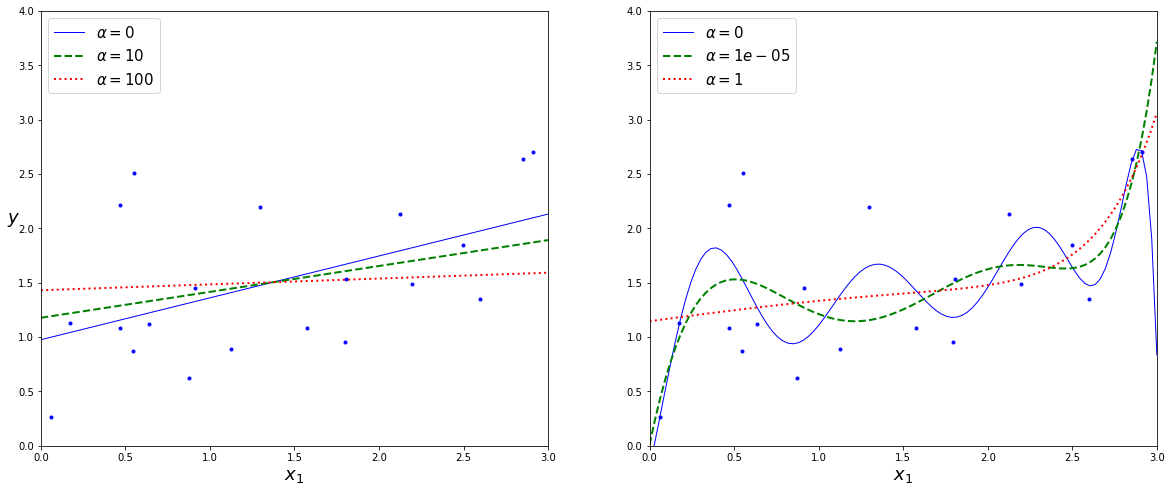

In [116]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(20,8))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

As with Linear Regression, we can perform Ridge Regression either by computing closed-form equation or by performing Gradient Descent. The pros and cons are the same. 

In [119]:
# closed-form using scikit-learn
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [121]:
# using SGD
sgd_reg = SGDRegressor(penalty='l2') # penalty parameter sets the type of regularization to use
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.4717882])

### Lasso Regression (L1 regularization)

*Least Absolute Shrinkage and Selection Operator Regression* is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the l1 norm of the weight vector instead of half the square of the l2 norm.

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827423, tolerance: 0.0009294783355207351
  positive)


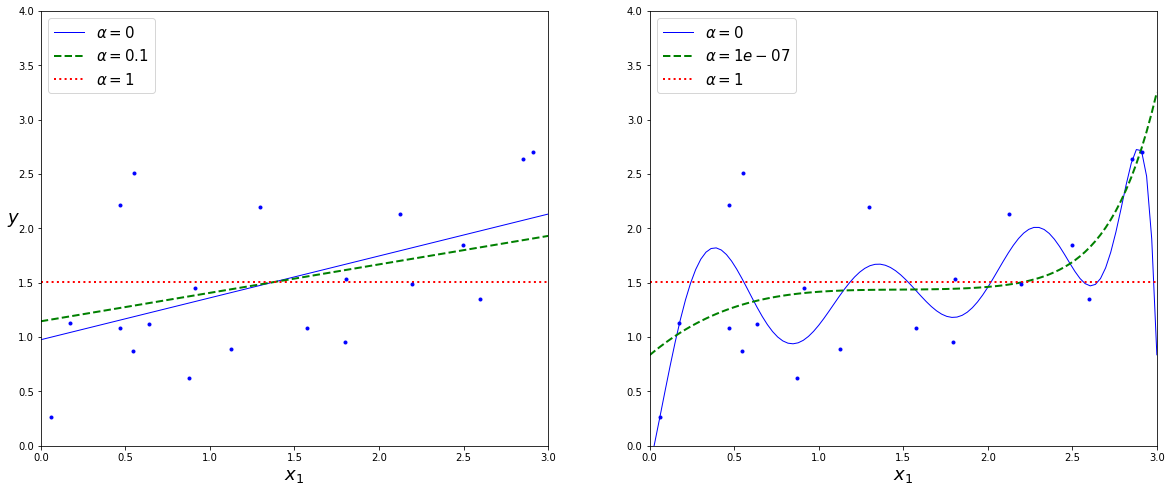

In [125]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(20,8))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

plt.show()

Lasso regression is trends to elimantes the weights of the least important features. It automatically performs feature selection and outputs a sparse model

In [126]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

### Elastic Net

Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso's regularization terms, and you can control the mix ratio *r*. When r=0, Elastic Net is equivalent to Ridge Regression and when r=1, its equivalent to Lasso Regression

In [127]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

### Early Stopping